<a href="https://www.kaggle.com/yashj05/ipl-eda?scriptVersionId=83013326" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import plotly as py
import cufflinks as cf

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.



In [3]:
from plotly.offline import iplot

In [4]:
py.offline.init_notebook_mode(connected =True)
cf.go_offline()

In [5]:
df = pd.read_csv('../input/ipldata/matches.csv', index_col='id', parse_dates=['date'])
df.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Per Team Win and Loss Analysis 

In [6]:
# Lets check the results of the matches played
df['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [7]:
# Checking if there is winner team in result column having value as 'tie'.
df[df['result']== 'tie']

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
190,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
401,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN
476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN
536,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi,NaN
11146,2019,Delhi,2019-03-30,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,tie,0,Delhi Capitals,0,0,P Shaw,Feroz Shah Kotla Ground,Anil Dandekar,Nitin Menon,Marais Erasmus
11342,2019,Mumbai,2019-02-05,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan,Nanda Kishore


#### Definitely there is winner team in winner column. This will help in win and loss analysis

In [8]:
# Checking if there is winner team in result column having value as 'no result'.
df[df['result'] == 'no result']

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
11340,2019,Bengaluru,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


#### The null values in the winner column is because there were 4 matches which had no result. This is due to match was stopped maybe due to rain.

In [9]:
#Creating a new dataframe consisting of 2 teams playing and winner of the match.
winlost = df[['team1', 'team2', 'winner']]
winlost

,team1,team2,winner
id,,,
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore
...,...,...,...
11347,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians
11412,Chennai Super Kings,Mumbai Indians,Mumbai Indians
11413,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals


In [10]:
# Creating a new column for a looser team 
winlost['looser'] = winlost.apply(lambda x: (x['team2'] if x['team1'] == x['winner'] else x['team1']), axis =1)

In [11]:
winlost.head()

,team1,team2,winner,looser
id,,,,
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore
2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,Mumbai Indians
3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,Gujarat Lions
4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,Rising Pune Supergiant
5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,Delhi Daredevils


In [12]:
wins = winlost['winner'].value_counts()
wins

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [13]:
looser = winlost['looser'].value_counts()
looser

Royal Challengers Bangalore    95
Delhi Daredevils               94
Kings XI Punjab                94
Kolkata Knight Riders          86
Mumbai Indians                 78
Rajasthan Royals               70
Chennai Super Kings            64
Sunrisers Hyderabad            50
Deccan Chargers                46
Pune Warriors                  33
Gujarat Lions                  17
Rising Pune Supergiants         9
Kochi Tuskers Kerala            8
Rising Pune Supergiant          6
Delhi Capitals                  6
Name: looser, dtype: int64

In [14]:
# Winning Count per team
wins.iplot(kind='bar', xTitle='Team', yTitle='Count', title='Winning Count of the team')

##### *  Mumbai Indians has the most succesfull team with 109 wins.
##### *  Rising Pune Supergiants has the least succesfull team with just 5 wins.
##### *  Many teams such as Gujarat Lions, Pune Warriors, Rising Pune Supergiant, Kochi Tuskers Kerala have least amount of         wins because they have played only 1 or 2 season of Ipl.
##### *  Delhi, Hyderabad, Pune have changed their name so there is different plots according to their name.

In [15]:
#Lossing Count per team
looser.iplot(kind= 'bar', xTitle= 'Team', yTitle= 'Count', title= 'Loosing count of the team')

####  Royal Challengers Banglore has maximum losses total of 95.
####  Delhi Capitals has minimum losses total of 6.

## Man of the match analysis

In [16]:
df.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [17]:
mom = df['player_of_match'].value_counts()
mom

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 226, dtype: int64

#### *  Chris Gayle has won most number of the Man of the match ie 21 times, followed by AB de Villiers 20 times. 
#### *  Rohit Sharma, MS Dhoni, David Warner has won same number of man of the match ie 17 times.
#### *  Since there are 226 Man of the match we will plot only top 20 names from the top.

In [18]:
mom[:20]

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
AM Rahane         12
V Kohli           12
V Sehwag          11
DR Smith          11
AD Russell        11
A Mishra          11
JH Kallis         10
KA Pollard        10
SE Marsh           9
AT Rayudu          9
Name: player_of_match, dtype: int64

In [19]:
mom[:20].iplot(kind='bar', xTitle='Players', yTitle='Count', title='Top 20 Man of the match winners')

## Match Hosted in each city

In [20]:
city = df['city'].value_counts()
city

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

#### *  Mumbai has hosted most number of IPL matches ie 101 times, followed by Kolkata 77 times and Delhi 74 times.
#### *  Many cities from South Africa and Dubai have also hosted IPL matches. This is because there were some security            issues and general election happening in India.
#### *  We will plot only Top 20 cities names which have hosted IPL.

In [21]:
city[:20].iplot(kind='bar', xTitle='Cities', yTitle='Count', title='Top 20 Hosting Cities')

## Matches Hosted at Venues

In [22]:
stadium = df['venue'].value_counts()
stadium

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

#### *  Eden Gardens have hosted most number of matches ie 77 times, followed by M Chinnaswamy Stadium and Wankhede Stadium 73 times.
#### *  We will plot only Top 20 venue names which have hosted IPL.

In [23]:
stadium[:20].iplot(kind='bar', xTitle='Venues', yTitle='Count', title='Top 20 Hosting Venues')

#### *  IPL is more interesting with famous rivalries between Mumbai, Chennai and Banglore.
#### * Let's find out head to head competition between 2 most sucessfull teams ie Mumbai Indians and Chennai Super Kings.

## MI vs CSK Head to Head

In [24]:
# Creating a function which will help to find out the matches between MI and CSK
def get_micsk(team1, team2):
    teams= ['Chennai Super Kings', 'Mumbai Indians']
    if team1 in teams and team2 in teams:
        return True
    else:
        return False

In [25]:
# Finding out total number of matches between MI and CSK
index =[]
for row in df.iterrows():
    flag = get_micsk(row[1]['team1'], row[1]['team2'])
    index.append(flag)

In [26]:
sum(index)

28

#### Total 28 matches were played between MI and CSK.

In [27]:
# Creating a dataframe of matches between MI and CSk
micsk = df[index]
micsk.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
96,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba,NaN
118,2009,Cape Town,2009-04-18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan,NaN
162,2009,Port Elizabeth,2009-05-16,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel,NaN
194,2010,Mumbai,2010-03-25,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba,NaN


In [28]:
# Creating a plot of the toss decision made by the both teams
micsk['toss_decision'].value_counts().iplot(kind='bar', title='Toss decision')

#### Team chose to field first 15 times and bat first 13 times.

In [29]:
# Creating a plot of Number of wins between both the teams
micsk['winner'].value_counts().iplot(kind='bar', title='MI vs CSK')

#### *  Mumbai Indians has won most number of matches ie 17 times whereas Chennai Super Kings have won 11 times. 
#### *  Clearly Mumbai Indians is more dominating between both the teams

In [30]:
# Creating a plot of "Player of the match" in this head to head
micsk['player_of_match'].value_counts().iplot(kind='bar', title='Player of the match')

#### Suresh Raina, Rohit Sharma, Keiron Pollard have won most number of player of the match ie 3 times.

In [31]:
# Creating a plot which shows by how many maximum runs or wickets did a team won.
temp = micsk[['winner', 'win_by_runs', 'win_by_wickets']]
temp = temp.set_index('winner')
temp.max()

win_by_runs       60
win_by_wickets     9
dtype: int64

<AxesSubplot:xlabel='winner'>

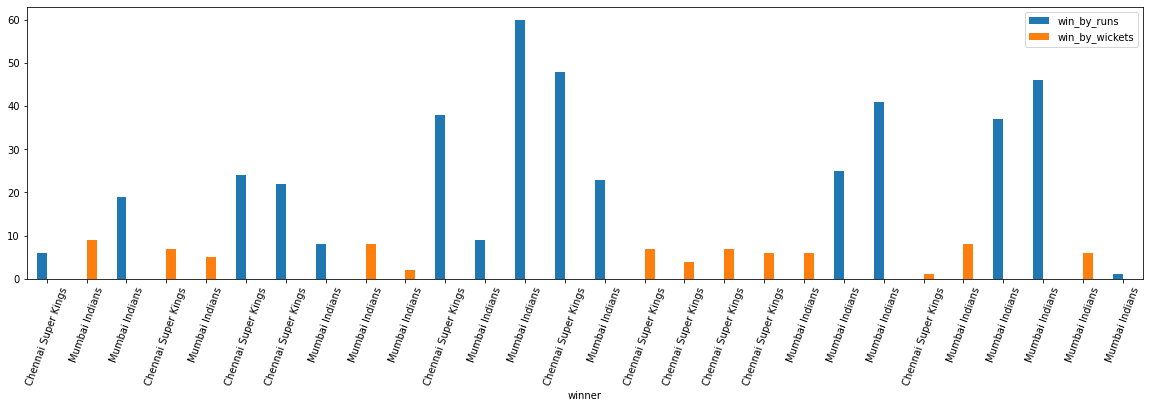

In [32]:
temp.plot.bar(figsize = (20,5), rot = 70)

## Season wise Match Summary

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

28.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

38.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.p

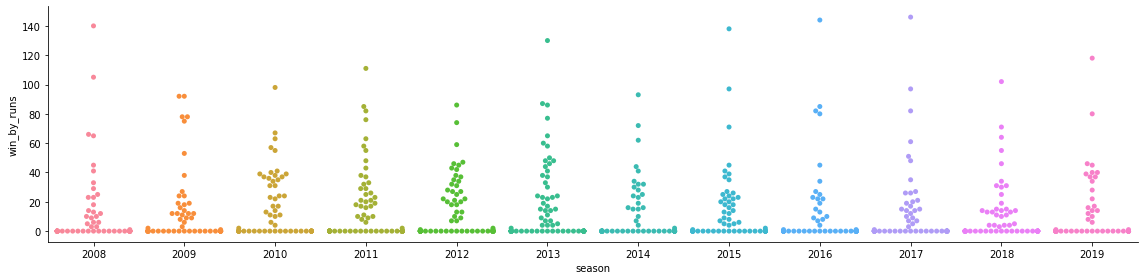

In [33]:
sns.catplot(x='season', y='win_by_runs', data=df, kind='swarm', height=4, aspect=4)

#### *  In 2017 season team has won with huge number of runs.
#### *  Markers at 0 point shows that team has won by number of wickets and not by number of runs

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

31.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

28.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

31.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.p

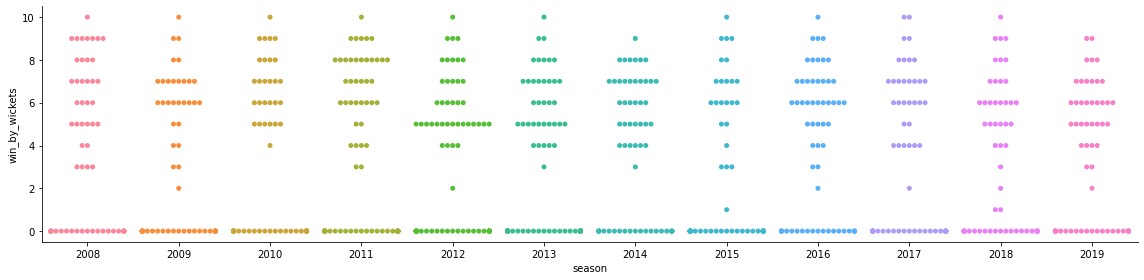

In [34]:
sns.catplot(x='season', y='win_by_wickets', data=df, kind='swarm', height=4, aspect=4)

#### *  Team have won most of the matches by a range of 6 to 8 wickets.
#### *  Marker at 0 point shows that team have won by runs and not by wickets.

In [35]:
# Counting the maximum number of runs won by a team per season
season_max_runs = df.groupby('season')[['win_by_runs']].max()
season_max_runs

,win_by_runs
season,
2008,140
2009,92
2010,98
2011,111
2012,86
2013,130
2014,93
2015,138
2016,144


In [36]:
# Bar plot of number of runs won by team per season
season_max_runs.iplot(kind='bar', title='Max number of runs per season')

#### In 2017 team has won max by 146 runs.

## Ball by Ball Analysis

In [37]:
deliveries = pd.read_csv('../input/ipldata/deliveries.csv', index_col='match_id')
deliveries.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [38]:
# TOP 20 Players who have faced most number of balls
deliveries['batsman'].value_counts()[:20]

V Kohli           4211
SK Raina          4044
RG Sharma         3816
S Dhawan          3776
G Gambhir         3524
RV Uthappa        3492
DA Warner         3398
MS Dhoni          3318
AM Rahane         3215
CH Gayle          3131
AB de Villiers    2977
KD Karthik        2890
AT Rayudu         2681
SR Watson         2639
PA Patel          2444
MK Pandey         2425
YK Pathan         2334
JH Kallis         2291
BB McCullum       2272
Yuvraj Singh      2207
Name: batsman, dtype: int64

In [39]:
deliveries['batsman'].value_counts()[:20].iplot(kind='bar')

#### Virat Kohli has faced most number of deliveries ie 4211 balls, followed by Raina 4044 balls and Rohit 3816 balls.

In [40]:
# Players who have bowled most number of balls
deliveries['bowler'].value_counts()[:20]

Harbhajan Singh    3451
A Mishra           3172
PP Chawla          3157
R Ashwin           3016
SL Malinga         2974
DJ Bravo           2711
B Kumar            2707
P Kumar            2637
UT Yadav           2605
SP Narine          2600
RA Jadeja          2541
Z Khan             2276
DW Steyn           2207
R Vinay Kumar      2186
SR Watson          2137
IK Pathan          2113
I Sharma           1999
A Nehra            1974
PP Ojha            1945
RP Singh           1874
Name: bowler, dtype: int64

In [41]:
deliveries['bowler'].value_counts()[:20].iplot(kind='bar')

#### Harbhajan Singh has bowled max deliveries ie 3451 balls, followed by Amit Mishra and Piyush Chawla.

In [42]:
deliveries['non_striker'].value_counts()[:20]

SK Raina          4173
S Dhawan          4090
V Kohli           4071
RG Sharma         3858
G Gambhir         3740
AM Rahane         3467
RV Uthappa        3381
DA Warner         3127
CH Gayle          3023
AB de Villiers    2996
MS Dhoni          2988
KD Karthik        2917
AT Rayudu         2832
PA Patel          2608
MK Pandey         2559
SR Watson         2470
SR Tendulkar      2427
BB McCullum       2356
JH Kallis         2333
M Vijay           2245
Name: non_striker, dtype: int64

In [43]:
deliveries['non_striker'].value_counts()[:20].iplot(kind='bar')

#### Suresh Raina has been max number of times in Non Striker end ie 4173 balls, followed by Dhawan 4090 balls and Kohli 4071 balls.

In [44]:
#Team with the most number of runs
runs  = deliveries.groupby('batting_team').sum()[['batsman_runs', 'total_runs']]
runs

,batsman_runs,total_runs
batting_team,,
Chennai Super Kings,25104,26418
Deccan Chargers,10885,11463
Delhi Capitals,2530,2630
Delhi Daredevils,23115,24388
Gujarat Lions,4629,4862
Kings XI Punjab,26468,27893
Kochi Tuskers Kerala,1758,1901
Kolkata Knight Riders,25895,27419
Mumbai Indians,28164,29809


In [45]:
runs.iplot(kind='bar', title='Runs Per team')

#### * Mumbai Indians has  scored most number of total runs ie 29,809 runs, followed by Royal Challengers Banglore 28126 runs and Kings XI Punjab 27893 runs.
#### *  Interestingly RCB and KXIP have scored most of number of runs but also have most number of losses. 

In [46]:
# Batsman who have scored most number of runs
batsman = deliveries.groupby('batsman')['batsman_runs'].sum()
batsman

batsman
A Ashish Reddy     280
A Chandila           4
A Chopra            53
A Choudhary         25
A Dananjaya          4
                  ... 
YV Takawale        192
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2765
Z Khan             117
Name: batsman_runs, Length: 516, dtype: int64

In [47]:
# Sorting in descending order
batsman = batsman.sort_values(ascending=False)
batsman

batsman
V Kohli        5434
SK Raina       5415
RG Sharma      4914
DA Warner      4741
S Dhawan       4632
               ... 
IC Pandey         0
J Denly           0
P Raj             0
Sunny Gupta       0
L Ablish          0
Name: batsman_runs, Length: 516, dtype: int64

In [48]:
# Bar plot of Top 20 batsman who have scored most number of runs
batsman[:20].iplot(kind='bar', title='Top 20 batsman with most number of runs')

#### Virat kohli has scored most number of runs in IPL ie 5434 runs, followed by Suresh Raina 5415 runs and Rohit Sharma 4914 runs.

In [49]:
# Most number of times a player has been dismissed
deliveries['player_dismissed'].value_counts()[:20]

SK Raina          162
RG Sharma         155
RV Uthappa        153
V Kohli           143
S Dhawan          137
G Gambhir         136
KD Karthik        135
PA Patel          126
AM Rahane         116
AT Rayudu         115
SR Watson         115
Yuvraj Singh      111
DA Warner         110
YK Pathan         110
AB de Villiers    110
CH Gayle          109
MS Dhoni          105
BB McCullum       104
V Sehwag           99
M Vijay            98
Name: player_dismissed, dtype: int64

In [50]:
deliveries['player_dismissed'].value_counts()[:20].iplot(kind='bar', title='Top 20 most dismissed player')

#### Raina has been most dismissed player ie 162 times, followed by Rohit Sharma 155 times and Robin Uthappa 153 times.

In [51]:
# Dismissal Kind
deliveries['dismissal_kind'].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [52]:
deliveries['dismissal_kind'].value_counts().iplot(kind='bar')

#### Players have been dismissed mostly by caught out by 5348 times, bowled by 1581 times and run out by 852 times.

## Conclusion